# 1. Install Dependencies and Setup

In [ ]:
# %pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-packages\packaging\_parser.py", line 124, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-p

In [8]:
%pip install tensorflow-gpu==2.10.0 opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/455.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/455.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/455.9 MB 12.0 MB/s eta 0:00:38
    --------------------------------------- 6.3/455.9 MB 14.8 MB/s eta 0:00:31
    --------------------------------------- 6.3/455.9 MB 14.8 MB/s eta 0:00:31
    --------------------------------------- 6.3/455.9 MB 14.8 MB/s eta 0:00:31
    --------------------------------------- 6.3/455.9 MB 14.8 MB/s eta 0:00:31
    --------------------------------------- 9.7/455.9 MB 7.2 MB/s eta 0:01:03
   - -------------------------------------- 12.6/455.9 MB 8.0 MB/s eta 0:00:56
   - -------------------------------------- 13.6/455.9 MB 8.4 MB/s eta 0:00:53
   - -------------------------------------- 13.6/455.9 MB 8.4 MB/s eta 0:00:53
   - -------------------------------------- 13.6/455.9 MB 8.4 MB/s 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Kushagra\\anaconda3\\envs\\py310\\Lib\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------- ----------------- 258.2/455.9 MB 3.7 MB/s eta 0:00:54
   ---------------------- ----------------- 258.7/455.9 MB 3.7 MB/s eta 0:00:54
   ---------------------- ----------------- 259.3/455.9 MB 3.7 MB/s eta 0:00:54
   ---------------------- ----------------- 259.5/455.9 MB 3.6 MB/s eta 0:00:54
   ---------------------- ----------------- 260.0/455.9 MB 3.6 MB/s eta 0:00:54
   ---------------------- ----------------- 260.6/455.9 MB 3.6 MB/s eta 0:00:54
   ---------------------- ----------------- 261.1/455.9 MB 3.6 MB/s eta 0:00:54
   ---------------------- ----------------- 261.9/455.9 MB 3.6 MB/s eta 0:00:54
   ----------------------- ---------------- 262.4/455.9 MB 3.6 MB/s eta 0:00:54
   ----------------------- ---------------- 262.9/455.9 MB 3.6 MB/s eta 0:00:54
   ----------------------- ---------------- 263.7/455.9 MB 3.6 MB/s eta 0:00:55
   ----------------------- ---------------- 264.5/455.9 MB 3.5 MB/s eta 0:00:54
   ----------------------- ------------

In [9]:
import sys
print(sys.version)

3.10.15 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:19) [MSC v.1929 64 bit (AMD64)]


In [5]:
# !pip list
import importlib

packages = ["tensorflow", "cv2", "matplotlib"]

for package in packages:
    if importlib.util.find_spec(package) is not None:
        print(f"{package} is installed.")
    else:
        print(f"{package} is NOT installed.")


tensorflow is installed.
cv2 is installed.
matplotlib is installed.


In [6]:
import tensorflow as tf
import os

In [10]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: Physical devices cannot be modified after being initialized

In [11]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [12]:
import cv2
import imghdr

In [13]:
data_dir = 'data' 

In [14]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# %pip install --upgrade pip setuptools wheel

  Using cached pip-25.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached pip-25.0-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.44.0
    Uninstalling wheel-0.44.0:
      Successfully uninstalled wheel-0.44.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# %pip install tensorflow-gpu==2.12.0

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-packages\packaging\_parser.py", line 124, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File "c:\Users\Kushagra\anaconda3\envs\py310\lib\site-p

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

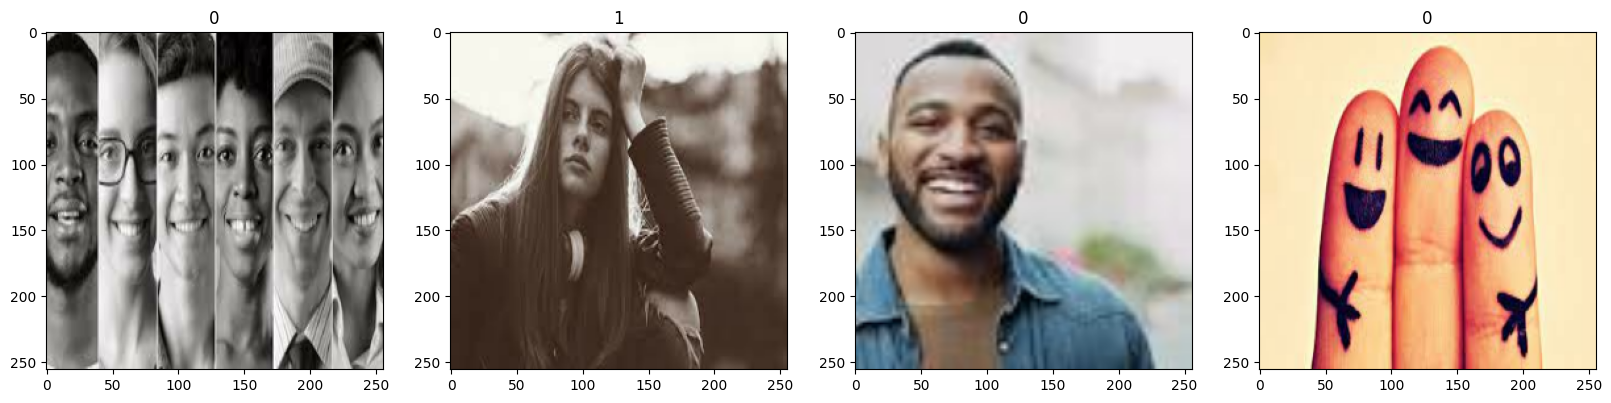

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.93333334, 0.93333334, 0.93333334],
          [0.93333

# 5. Split Data

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

7

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [26]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 526ms/step - loss: 1.1502 - accuracy: 0.4643 - val_loss: 0.6355 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 3s 282ms/step - loss: 0.6155 - accuracy: 0.6429 - val_loss: 0.6222 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 3s 283ms/step - loss: 0.5599 - accuracy: 0.7321 - val_loss: 0.4990 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 3s 278ms/step - loss: 0.4842 - accuracy: 0.7768 - val_loss: 0.5443 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 3s 275ms/step - loss: 0.5036 - accuracy: 0.7366 - val_loss: 0.4538 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 3s 272ms/step - loss: 0.4196 - accuracy: 0.8170 - val_loss: 0.4425 - val_accuracy: 0.7812
Epoch 7/20
7/7 [==============================] - 3s 268ms/step - loss: 0.3774 - accuracy: 0.8795 - val_loss: 0.2568 - val_accuracy: 0.9375
Epoch 8/20
7/7 [===

# 8. Plot Performance

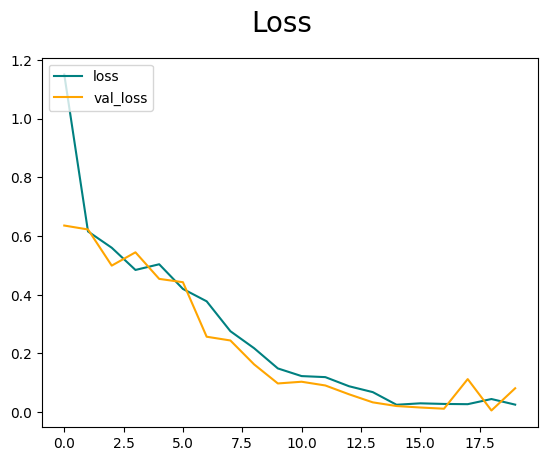

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

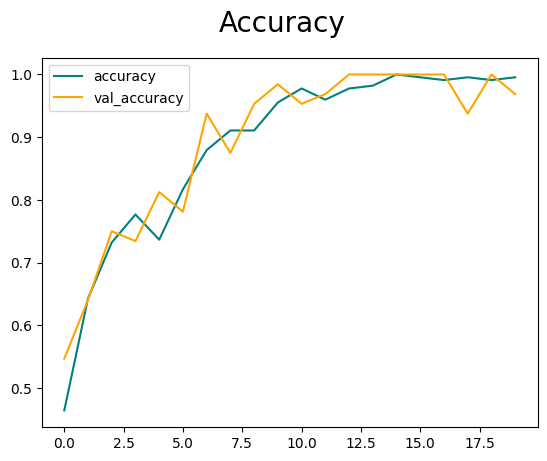

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 555ms/step


In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [41]:
import cv2

In [54]:
def predict(image_path): 
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256,256))
    img = img/255
    img = np.expand_dims(img, axis=0)
    predictions = model.predict(img)
    if predictions < 0.5: 
        return 'Predicted class is Sad'
    else:
        return 'Predicted class is Happy'

In [55]:
predict('profile.jpg')

1/1 [==============================] - 0s 29ms/step


'Predicted class is Happy'

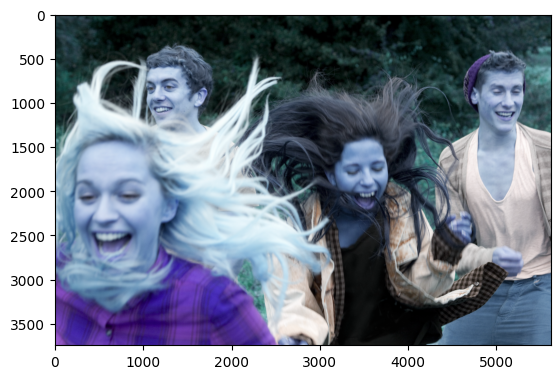

In [42]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

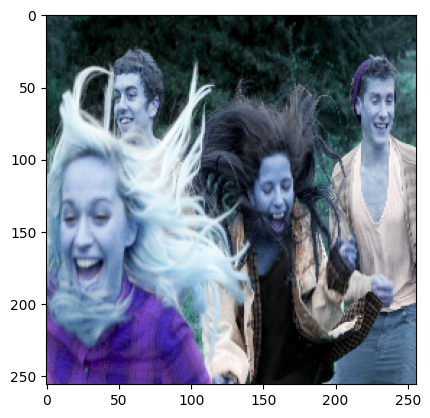

In [43]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 337ms/step


In [45]:
yhat

array([[0.9987118]], dtype=float32)

In [53]:
if yhat < 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [47]:
from tensorflow.keras.models import load_model

In [54]:
model.save(os.path.join('models','imageclassifier2.h5'))

In [2]:
new_model = load_model('./models/imageclassifier.h5')

In [48]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


array([[0.01972742]], dtype=float32)